In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Define the XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [3]:
# Define the neural network class
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer with 4 neurons
        self.output = nn.Linear(4, 1)  # Output layer with 1 neuron
        self.activation = nn.ReLU()  # Non-linearity

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = torch.sigmoid(self.output(x))  # Sigmoid for binary classification
        return x

In [4]:
# Initialize the model, loss function, and optimizer
model = XORNet()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [9]:
# Training loop
epochs = 1000
losses = []
accuracies = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    output = model(X)
    predictions = (output > 0.5).float()
    print(output.shape, predictions.shape, y.shape)
    accuracy = (predictions == y).float().mean().item()
    accuracies.append(accuracy)
    
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    break

    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

torch.Size([4, 1]) torch.Size([4, 1]) torch.Size([4, 1])


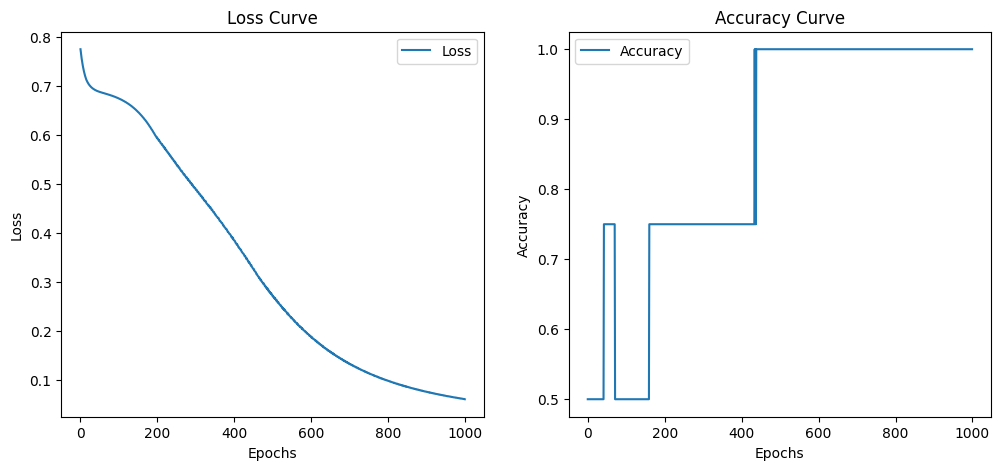

In [6]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [7]:
# Test the model
with torch.no_grad():
    predictions = model(X).round()
    print("Predictions:")
    print(predictions)

Predictions:
tensor([[0.],
        [1.],
        [1.],
        [0.]])
